In [1]:
using Plots

## Margins

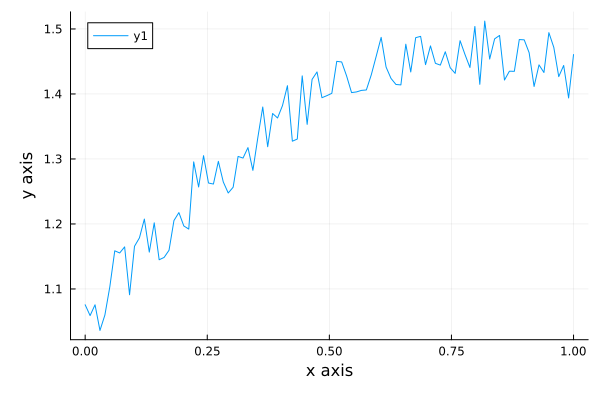

In [2]:
using Plots.PlotMeasures
x = range(0,1, length=100)
y = sin.(x) + cos.(x) + rand(100)./10

dy = 0.1 .* y
p = plot(xaxis = "x axis", yaxis = "y axis")
plot(p, x, y, bottom_margin = 20px, left_margin = 20px)

# Latex Fonts: create a figure with homogenous fonts

In [3]:
using Plots
using LaTeXStrings
#plot_font = "Computer Modern"  # fonts may be selected here
default(
#    fontfamily=plot_font,
    linewidth=2, 
    framestyle=:box, 
    label=nothing, 
    grid=false
)
plot(sort(rand(10)),sort(rand(10)),label="Legend")
plot!(xlabel=L"\textrm{Standard~text} / \mathrm{cm^3}")
plot!(ylabel="Same font as everything")
annotate!(0.5,0.8,text("My note",plot_font,12))

LoadError: UndefVarError: `plot_font` not defined

## 3D Plots

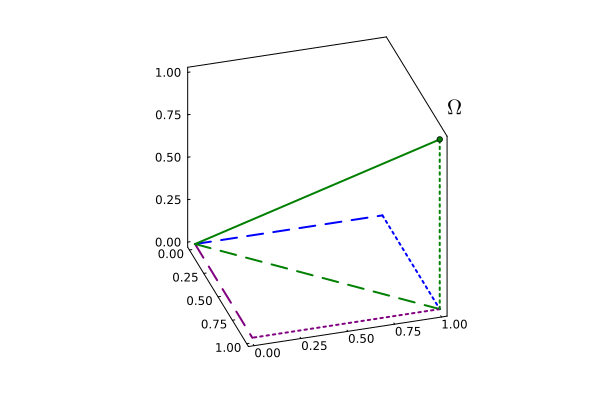

In [4]:
using Plots, LaTeXStrings

extract(P,V) = [ [P[1], V[1]], [P[2], V[2]], [P[3], V[3]] ]

P, xc, yc, xyc, dc = [0,0,0], [0,1,0], [1,0,0], [1,1,0], [1,1,1]

plot(extract(P,xc)...,  st=:line,  linecolor=:blue, linestyle=:dash, camera=(73,30), legend = nothing)
plot!(extract(P,yc)..., st=:line, linecolor=:purple, linestyle=:dash, arrow=true)
plot!(extract(P,xyc)..., st=:line, linecolor=:green, linestyle=:dash)
plot!(extract(P,dc)..., st=:line, linecolor=:green)
plot!(extract(xyc,xc)..., st=:line, linecolor=:blue, linestyle=:dot)
plot!(extract(xyc,yc)..., st=:line, linecolor=:purple, linestyle=:dot)
plot!(extract(xyc,dc)..., st=:line, linecolor=:green, linestyle=:dot)

scatter!([1], [1], [1], color = "green", label="", markersize = 3)
plot!([0.77], [0.75], text=L"\Omega")

## Dataframes

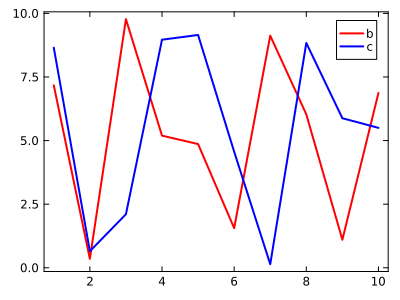

In [5]:
using DataFrames
using StatsPlots
gr(size=(400,300))
df = DataFrame(a = 1:10, b = 10 .* rand(10), c = 10 .* rand(10))
@df df plot(:a, [:b :c], colour = [:red :blue])

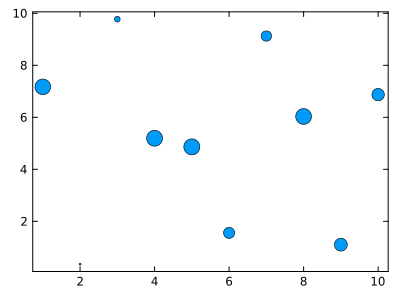

In [6]:
@df df scatter(:a, :b, markersize = 4 .* log.(:c .+ 0.1))

# Inset and subplots

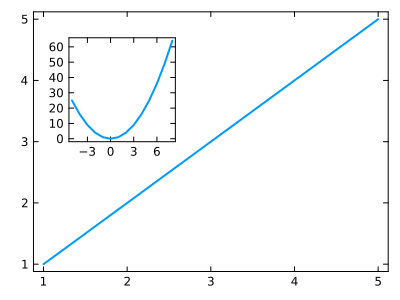

In [7]:
plot( 1:5, legend = :right)
plot!( -5:8, (-5:8).^2, 
    inset = (1, bbox(0.1,0.1,0.3,0.4)), 
    subplot = 2,
    legend = false
)

# Margin, layout, label rotation, title location, legend

In [8]:
gr()

Plots.GRBackend()

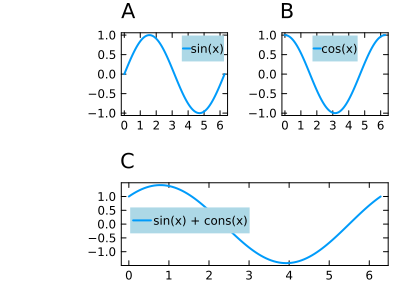

In [9]:
using Plots.PlotMeasures
x = range(0,2pi, length=100)
y1 = sin.(x) 
y2 = cos.(x) 
y3 = cos.(x) + sin.(x) 
m = hcat(y1,y2,y3)
plot(x, m, layout = @layout([a b; c]), 
    title = ["A" "B" "C"], titlelocation = :left, 
    legend = [:topright :top :left], foreground_color_legend = nothing, background_color_legend = :lightblue,
    label = [ "sin(x)" "cos(x)" "sin(x) + cons(x)"],
    left_margin = [20mm 0mm], bottom_margin = 10px)

# Legend position

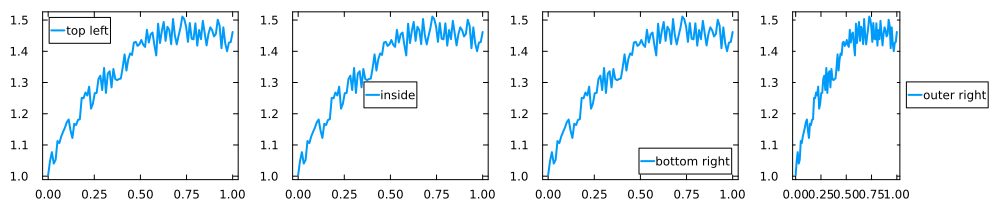

In [10]:
x = range(0,1, length=100)
y = sin.(x) + cos.(x) + rand(100)./10
p1 = plot(x, y, legend = :topleft, label = "top left")
p2 = plot(x, y, legend = :bottomright, label = "bottom right")
p3 = plot(x, y, legend = :outerright, label = "outer right")
p4 = plot(x, y, legend = :inside, label = "inside")
plot(p1,p4,p2,p3, layout = (1,4), size = (1000,200))

# Box, grid

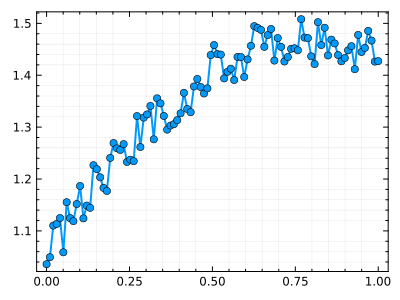

In [11]:
x = range(0,1, length=100)
y = sin.(x) + cos.(x) + rand(100)./10
plot(x, y, linestyle=:solid, marker = :circle,
    framestyle = :box, minorgrid = :true)

# Series type

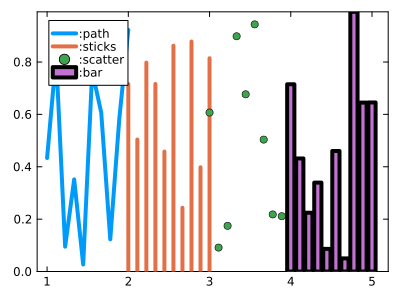

In [12]:
x = range(0,1, length=10)
y = rand(10,4)
s = [:path, :sticks, :scatter, :bar]
l = [":path", ":sticks", ":scatter", ":bar"]
p=plot()
for (i,st) in enumerate(s)
    plot!(p,x .+ i, y[:,i] , seriestype=s[i], lw = 4, label  = l[i])
end
plot(p)

# Linestyle

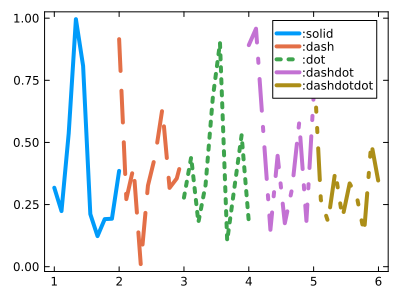

In [13]:
y = rand(10,5)
l = [":solid", ":dash", ":dot", ":dashdot", ":dashdotdot"]
s = [:solid, :dash, :dot, :dashdot, :dashdotdot]
p=plot()
for (i,st) in enumerate(s)
    plot!(p,x .+i , y[:,i], linestyle=s[i], lw = 4, label  = l[i])
end
plot(p)

# Error bars

In [14]:
x = range(0,1, length=100)
y = sin.(x) + cos.(x) + rand(100)./10
dx = 0.05 .* x
dy = 0.1 .* y;

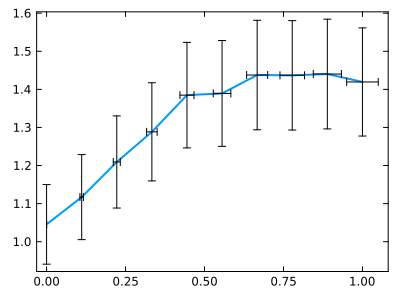

In [15]:
x = range(0,1, length=10)
y = sin.(x) + cos.(x) + rand(10)./10
dx = x .* 0.05
dy = 0.1 .* y
plot(x, y, xerror = dx, yerror = dy, framestyle = :box)

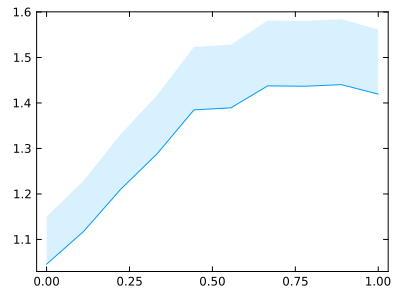

In [16]:
plot(x, y, ribbon = (0.0, dy), fillalpha = 0.15, lw = 1, framestyle = :box)

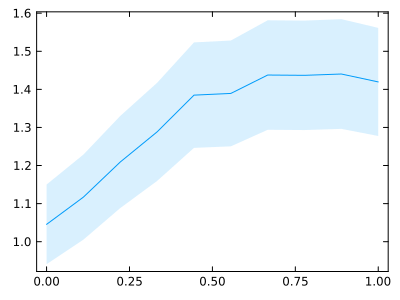

In [17]:
plot(x, y, ribbon = dy, fillalpha = 0.15, lw = 1, framestyle = :box)

# Second axis (twinx & twiny)

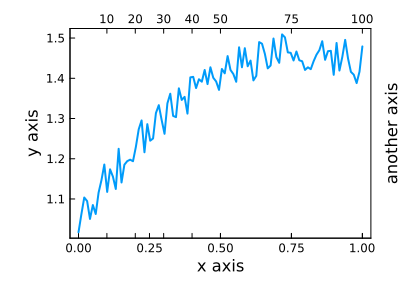

In [18]:
using Plots.PlotMeasures
x = range(0,1, length=100)
y = sin.(x) + cos.(x) + rand(100)./10

dy = 0.1 .* y
p = plot(xaxis = "x axis", yaxis = "y axis")
plot(p, x, y, bottom_margin = 20px, left_margin = 20px)

x2 = [10, 20, 30, 40, 50, 75, 100]
y2 = x2 ./ 100
plot!(twiny(), x, [NaN for el in x],
    xtick = (y2, ["$i" for i in round.(x2)]),
    label = "")

plot!(twinx(), 
    ytick = :none,
    ylabel = "another axis",)



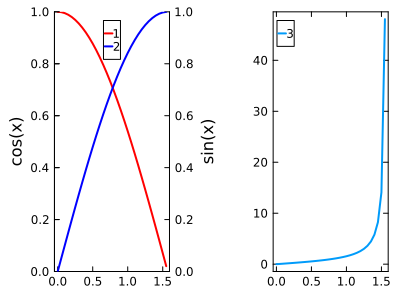

In [19]:
using Plots.PlotMeasures

x = 0:0.05:pi/2
l = @layout [a b]
p1 = plot(x, cos.(x), lc=:red, legend=:topleft, label="1",right_margin=5mm, ylims=(0.0, 1.0), ylabel = "cos(x)")
plot!(twinx(), x, sin.(x), ylims=(0.0, 1.0), lc=:blue, label=false, ylabel = "sin(x)")

plot!(p1, [],[], lc=:blue, label="2", )   #this allows placing both label "1" and "2" in the same box.
                                        #otherwise both label will be independent and ends up often on top of eachother
plot!(legend = :top)
p2 = plot(x, tan.(x), label="3", )
plt = plot(p1, p2, layout = l)

# Log and semilog plots

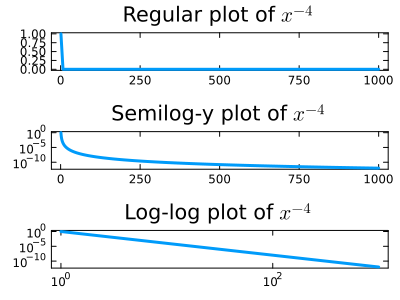

In [20]:
gr()
using LaTeXStrings
g(x) = 1/x^4
p1 = plot(g, 1, 1000, lw=3,
            #title= L"\textrm{Regular plot of} \mathrm{x^{-4}}",
            title= "Regular plot of " * L"x^{-4}",
            label=false)

p2 = plot(g, 1, 1000, lw=3,
            yscale=:log10, 
            title="Semilog-y plot of " * L"x^{-4}",
            label=false)

p3 = plot(g, 1, 1000, lw=3,
            xscale=:log10, 
            yscale=:log10, 
            title="Log-log plot of " * L"x^{-4}",
            label=false)

plot(p1,p2,p3,layout=(3,1))



# Backend comparison

In [21]:
y = rand(10);

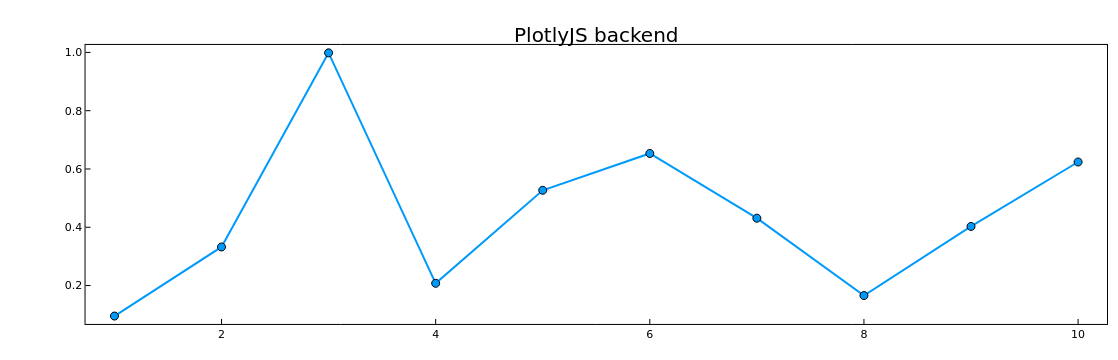

In [26]:
plotlyjs() # PlotlyJS backend
plot(y, size = (400,300), title = "PlotlyJS backend", 
linestyle=:solid, marker = :circle)

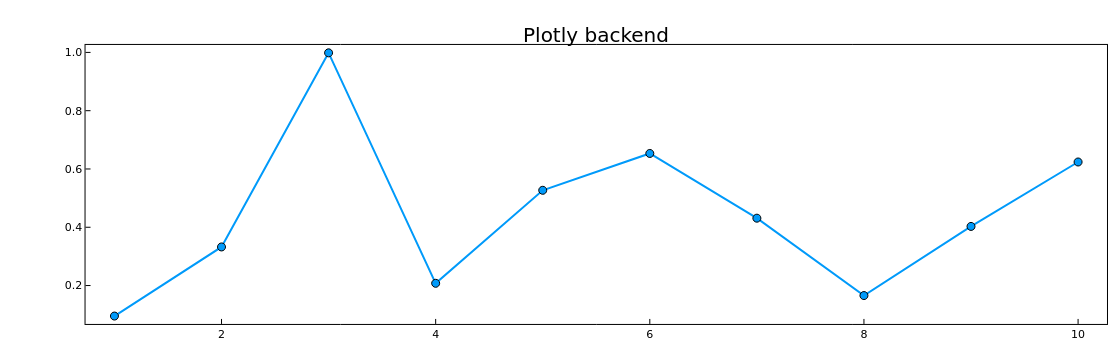

In [27]:
plotly() # Plotly backend
plot(y, size = (400,300), title = "Plotly backend", 
linestyle=:solid, marker = :circle)

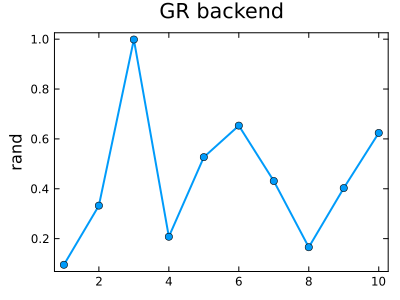

In [24]:
gr() # default backend
plot(y, size = (400,300), ylabel = "rand", title = "GR backend", 
linestyle=:solid, marker = :circle)

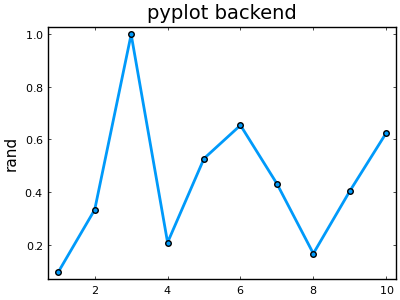

sys:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
sys:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
sys:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
sys:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


In [25]:
pyplot()  # matplotlib backend
plot(y, size = (400,300), ylabel = "rand", title = "pyplot backend", 
linestyle=:solid, marker = :circle,)